## Week 13 

### Additional exercise on Reinforcement learning

### Exercise II. Q-Learning for Finance 

In this exercise, we will train a Q-learning algorithm to determine when to sell, buy or hold stocks from a particular company. Start by loading the stocks from AliBaba, Google and IBM using the lines below 

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


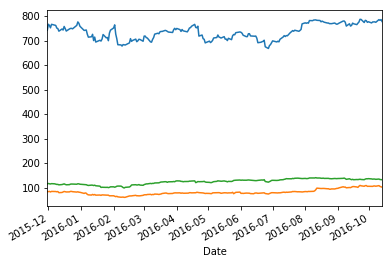

In [5]:
import yfinance as yf
# Get the data of the stock AAPL
data1 = yf.download('GOOG','2015-12-01','2016-10-14')
data2 = yf.download('BABA','2015-12-01','2016-10-14')
data3 = yf.download('IBM','2015-12-01','2016-10-14')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
#Plot the close price of the AAPL
data1['Adj Close'].plot()
data2['Adj Close'].plot()
data3['Adj Close'].plot()
plt.show()


#### Part I: Environment

As a first step we will implement the RL algorithm for a single company. Yet once you have it for this company, extending it to other types of stocks should not take you too much time. 

In this first part, we will take care of the environment. To represent the state of the environment, we store a length $d$ sequence of the time variation of the stock. We will define the function so that its output returns the sigmoid of the derivative at time t. Such a value will be close to one when the value starts increasing and close to 0 otherwise. We will store the sequence of those values in the vector 'BuyProbability'. This vector should be of size 'w' where 'w' is the number of stock rates you keep track of. 

In [ ]:
def getState(d, w, StockData):
    
    
    '''The function takes as input the list of stock values at day 'd' as well as a window size 'w' and 
    return an estimate of the probability to buy'''
    
    
    return BuyProbability

#### Part II. The agent

We will now focus on the construction of the agent. It is a little up to you to decide how you want to define the network. We will use Keras to represent our agent as a neural network. A good idea is to take a Sequential neural network with the following structure 

- First dense layer with 2^6 units, the input dimension should be the dimension of the state variable (length of the window of stock changes), activation = relu
- Second dense layer with 2^5 units, activation = relu
- Third dense layer with 2^3 units, activation = relu
- Output layer with number of units equal to the number of possible actions ($3$ in this case) and linear activation (we want the output to represent the value of each action for a particular state 's')


The input dimension should thus be the number of actions (3 in the single stock case, if you later extend your model to a portfolio with $n$ stocks, the number of action at each time will turn into 3^n). The neural network will take as input the state of our environment and return an approximate value for each action. 

In [ ]:
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.optimizers import Adam

'''build the model according the the specifications above'''

model = 0



#### Part III. Reinforcement learning. 

Now that we have the agent and the environment, we can set up the learning framework. When training a RL agent, we will rely on the notion of episode. Once episode will consist of a sequence of time steps which we process up to when a particular condition is met (you can set that condition as you want. Here we will take it to be just a particular time frame, i.e. a fixed number of time steps. Note that we could take it to be a given return we want to achieve)


In the learning stage, we will use an $\epsilon$-greedy approach and alternate between exploration and exploitation. As we did in the autonomous cab driving 'gym' exercise, draw a number between $0$ and $1$ uniformly at random. if the number is less than $\epsilon$, take an action at random (buy, hold, sell). If the number is above epsilon, we will take the action following the policy encoded by our neural network. We will improve the bandit model by considering a dynamic ratio between exploration and exploitation. We will start with pure exploration $\varepsilon=1$ and then gradually reduce this value for $\epsilon$ as $\epsilon*\alpha$ (you can take the $\alpha$ value suggested below) until we reach a sufficiently small value for $\epsilon$ (minEps below). When reaching this value, we will stick to it. 


epsilon = 1.0
minEps = 0.01
alpha = 0.995

At each time step, set the current reward to $0$. Determine whether the agent should explore or exploit. Depending on the action you sample, 

- If the action is 'buy', store the current price and the number of stocks in your portfolio (As a first assumption, you can consider that one can only buy one stock at a time)

- If the action is 'sell', there are multiple ways to measure the reward (i.e. the value of the sell). 

    1. Either you take the last action you bought and compute the reward from this action as $R = \text{sell price} - \text{value}_k$
    2. Or you only keep track of the total amount. Spread this total amount equally among all your stocks as $value_k = \frac{Total}{N}$ and compute the reward as $R = \text{sell price} - \text{value}_k$
    
In both case we want to give the agent a reward only if the amount of the sale is above the amount at which the stock was bought (or average amount if in the second framework). You should thus have a line of the form $R = \max(value_sell - value_buy, 0)$

You also want to keep track of the total profit. 

At the end of the iteration, set the state of the environment to the next state and store the tuple (current_state, action, reward, next state, completionEpisode)

where completionEpisode is set to 'true' only once the episode is completed (i.e. the maximum number of iterations is reached) and is False otherwise. 

We will also update the weights of our network once we have accumulated a sufficient amount of data (it is up to you for how long you want to wait before updating the weights. A good choice is between 20 to 40 time steps)

Once you have waited sufficiently long enough, we will update the network following Bellman equation. From this equation, we want the Q map to match the Right handside 

$$y(\mathbf{x}; \mathbf{\theta}) =  \text{reward} + \gamma \max_{a'} Q[s', a']$$

That is you should set the target as $t = R + \gamma \max_{a'} Q[s', a']$ where $Q[s', a']$ is obtained from the network at 'next state'. Then update the network in a SGD framework. 

In [ ]:
for episode in range(numTotalEpisodes):
    
    
    
    
    for numTimeSteps in range(numTimeSteps):
        
        '''Start by determining whether you should explore or exploit'''
        
        
        
        '''Then get the resulting action and compute the reward'''
        
        
        
        '''Store the tuple (state, action, reward, next_state)'''
        
        
        
        if numSamples > maxSamples:
        
            '''Once in a while, when you have enough data, update the neural network. Here we '''
            for state in memory: 
                
                
                
                '''update the model for each state using Bellman equation, the current reward, the current 
                and previous states as well as the network'''
                
                model.fit(state, target)
                
                '''update the epsilon after the fit'''
        
        

#### Part IV. From learning to experience

Once you have learned the network, you can evaluate it through a simple loop. 

In [ ]:
for numTimeSteps in range(trainingFrame):
    
    
    
    '''simple select at each step the action that maximizes the value stored in the neural network'''
    
    action = np.amax(model.predict(state))
    
    '''fill in the code by updating the state of the environment as well as your portfolio'''
    


#### Part V. Possible improvements

So far we only defined our environm